# Proyecto Final UD2
#### UD2. Aprendizaxe Supervisada
#### MP. Sistemas de Aprendizaxe Automáticos
#### IES de Teis (Vigo), Vanesa Resúa Eiras, Cristina Gómez Alonso

En este proyecto, los alumnos del módulo de Machine Learning deberán demostrar los conocimientos adquiridos durante la UD2 y aplicar al menos dos algoritmos diferentes de aprendizaje supervisado vistos en clase (KNN, Regresión Lineal, Regresión Logística, Árboles de Decisión (o Randm Forest), SVM).

Para ello, tomaremos como referencia el dataset credit_train.csv y credit_test.csv que contienen la información sobre una campaña de márketing llevada a cabo mediante llamadas teléfonicas para captar clientes que quieran acceder a un crédito.

**Features o Input variables:**

1 - age: edad numérica

2 - job : tipo de trabajo (puede tomar los valores: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : estado civil (puede tomar los valores: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education : nivel de estudios (puede tomar los valores: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: ya tiene un crédito solicitado por defecto? (puede tomar los valores: 'no','yes','unknown')

6 - housing: tiene hipoteca? (puede tomar los valores: 'no','yes','unknown')

7 - loan: tiene una cuenta personal? (puede tomar los valores: 'no','yes','unknown')

8 - contact: tipo de comunicación de contacto (puede tomar los valores: 'cellular','telephone')

9 - month: último mes de contacto (puede tomar los valores: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: último día de la semana en el que se le ha contactado (puede tomar los valores: 'mon','tue','wed','thu','fri')

11 - duration: duración del último contacto en segundos (numérico). Importante: este atributo afecta en gran medida a la salida ya que si duration es 0, entonces  la salida es 'no')

12 - campaign: número de veces que se le ha contactado durante la campaña a este cliente (numérico, incluye el último contacto)

13 - pdays: número de días que han pasado desde que el cliente fue contactado por última vez(numérico; 999 significa que no ha sido contactado anteriormente)

14 - previous: número de contactos anteriores a esta campaña a este cliente(numérico)

15 - poutcome: resultado de la última campaña de marketing (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - quarterly indicator (numérico)

17 - cons.price.idx: IPC - indicador mensual (numérico)

18 - cons.conf.idx: índice de confianza de los consumidores - indicador mensual (numérico)

19 - euribor3m: euribor tasa 3 meses - indicador diario (numérico)

20 - nr.employed: número de trabajadores - indicador en porciones  (numérico)

**Output variable (desired target):**

21 - y: Suscripción al crédito por parte del cliente? (binary: 'yes','no')

Los requisitos mínimos de este proyecto consisten en:

* Etapas comunes 1, 2 y 3 de importación, análisis numérico y visual, así como preprocesado.
* Para cada algoritmo que apliques deberás de mantener la siguiente estructura de 5 etapas (del 4-8), pero puedes añadir subapartados o etapas adicionales.
* En cada etapa se deben añadir explicaciones justificativas de lo que se quiere hacer, así como de los resultados obtenidos.
* Como resultado final, se deben contrastar los resultados obtenidos y comparar los algoritmos utilizados indicando claramente cual y porqué obtiene mejor resultados.

Cualificaciones:
- Uso de 2 algoritmos: cualificación máxima de 7 puntos
- Uso de 3 algoritmos: cualificación máxima de 10 puntos.




----------

### Justificación de la Selección de Algoritmos

Dado que el objetivo de este proyecto es predecir una variable binaria, nos encontramos ante un problema de **Clasificación Binaria**. Por este motivo, hemos descartado algoritmos de regresión (como la Regresión Lineal), ya que estos están diseñados para predecir valores continuos numéricos y no categorías.

Implementaremos y compararemos los siguientes **tres algoritmos de clasificación**:

1.  **K-Nearest Neighbors (KNN):**
    * **Por qué lo elijo:** Es un algoritmo muy intuitivo. Funciona buscando a los clientes más "parecidos" al que queremos analizar. Si los clientes similares contrataron el crédito, es probable que este también lo haga.
    * **Nota:** Para que funcione bien, he tenido que escalar los datos antes.

2.  **Árbol de Decisión (Decision Tree):**
    * **Por qué lo elegimos:** Es un modelo "White Box" (Caja Blanca), lo que significa que es altamente interpretable. Nos permitirá entender *qué reglas* sigue el modelo para decidir si conceder un crédito o no (ej: "si la duración de la llamada es > 500s...").

3.  **Regresión Logística (Logistic Regression):**
    * **Por qué lo elegimos:** Es el algoritmo estándar por excelencia para la **clasificación binaria**.
    * **Ventaja:** A diferencia de los anteriores, no solo nos da una clasificación (0 o 1), sino que nos ofrece la **probabilidad matemática** de que un cliente acepte el crédito (ej: 85% de probabilidad de 'Sí'). Esto es extremadamente útil para la toma de decisiones de negocio en el banco.

Con esta combinación de tres modelos (uno basado en distancias, otro en reglas lógicas y otro probabilístico/estadístico) cubrimos un espectro completo de técnicas de Machine Learning Supervisado:D

------

## 1. Importación de paquetes y dataset

Importación del dataset

In [6]:
import pandas as pd 
import numpy as np        # Cálculos numéricos
import matplotlib.pyplot as plt   # Gráficos
import seaborn as sns     # Gráficos avanzados
from sklearn import datasets

df_train = pd.read_csv("credit-train.csv")
df_train.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


-------

## 2.EDA y Visual EDA

Comenzamos cargando el conjunto de datos de entrenamiento. Mediante .info() y .describe(),

In [7]:
print("--- Información del Dataset ---")
df_train.info()

--- Información del Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17 

In [9]:
# 2. Estadísticas básicas
print("\n--- Descripción Estadística ---")
display(df_train.describe())



--- Descripción Estadística ---


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [8]:
df_train.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

Tras realizar la comprobación de valores nulos, observamos que el dataset está completo y no presenta valores faltantes. Por tanto, no es necesario realizar imputación de datos y procedemos directamente al Análisis Exploratorio de Datos (EDA) para entender la distribución de las variables.

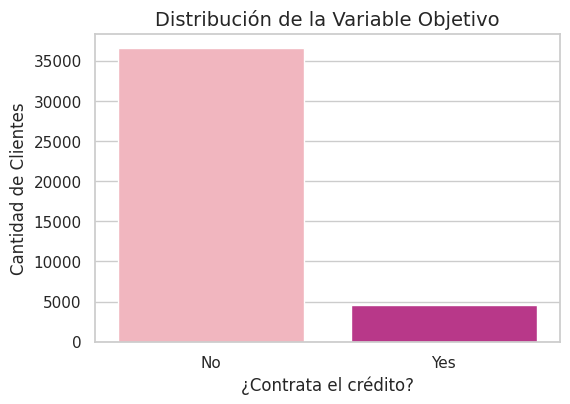

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))

# Gráfica en tonos rosas
sns.countplot(x='y', hue='y', data=df_train, palette='RdPu', legend=False)

# --- EL TRUCO ESTÁ AQUÍ ---
# Le decimos manualmente qué escribir en el eje X
plt.xticks([0, 1], ['No', 'Yes']) 
# --------------------------

plt.title('Distribución de la Variable Objetivo', fontsize=14)
plt.xlabel('¿Contrata el crédito?')
plt.ylabel('Cantidad de Clientes')
plt.show()


En este gráfico observamos la distribución de la variable `y` (Target), que representa si el cliente contrató el depósito o no.

* La barra más alta (color rosa claro). Representa a la gran mayoría de clientes que **rechazaron** la oferta.
* La barra pequeña (color rosa fuerte). Representa a la minoría que **aceptó** el crédito.

**¿Qué implica?**
Que no podemos fiarnos solo de la métrica de **Precisión Global (Accuracy)**.
* *Ejemplo:* Si el modelo predijera "No" para todos los clientes, acertaría el 89% de las veces, pero sería un modelo inútil porque no detectaría ningún cliente potencial.

**Solución:**
Por este motivo, en los siguientes apartados no solo miraremos el Accuracy, sino que prestaremos especial atención a la **Matriz de Confusión** para asegurarnos de que el algoritmo está aprendiendo a identificar correctamente los "1" (los clientes que sí nos interesan).

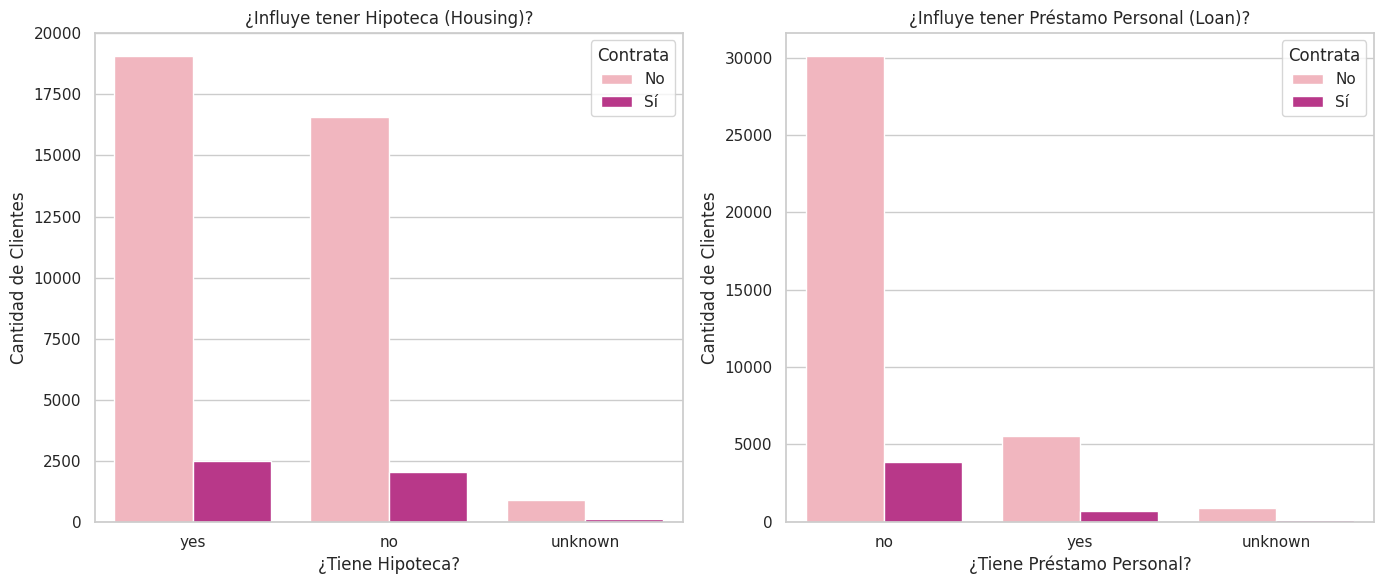

In [18]:
# Creamos una figura con 2 gráficas (una al lado de la otra)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# GRÁFICA 1: Hipoteca (Housing) vs Resultado
sns.countplot(x='housing', hue='y', data=df_train, palette='RdPu', ax=ax[0])
ax[0].set_title('¿Influye tener Hipoteca (Housing)?')
ax[0].set_xlabel('¿Tiene Hipoteca?')
ax[0].set_ylabel('Cantidad de Clientes')
ax[0].legend(title='Contrata', labels=['No', 'Sí'])

# GRÁFICA 2: Préstamo Personal (Loan) vs Resultado
sns.countplot(x='loan', hue='y', data=df_train, palette='RdPu', ax=ax[1])
ax[1].set_title('¿Influye tener Préstamo Personal (Loan)?')
ax[1].set_xlabel('¿Tiene Préstamo Personal?')
ax[1].set_ylabel('Cantidad de Clientes')
ax[1].legend(title='Contrata', labels=['No', 'Sí'])

plt.tight_layout()
plt.show()

Hemos analizado si tener deudas previas influye en la decisión de contratar el nuevo producto:

1.  **Hipoteca (`housing`):**
    * La mayoría de los clientes del banco **SÍ tienen una hipoteca** (barra 'yes' más alta).
    * Visualmente, parece que la proporción de "Sí contrata" (color oscuro) se mantiene estable, tenga o no hipoteca. Esto sugiere que tener una casa pagada o no, no es determinante.

2.  **Préstamo Personal (`loan`):**
    * La mayoría de clientes **NO tienen préstamos personales**.
    * Aquellos que no tienen préstamos personales parecen ligeramente más inclinados a contratar el producto, posiblemente porque tienen más capacidad de ahorro al no tener esa deuda extra.

**Conclusión:** Estas variables aportan información sobre el perfil, pero por sí solas no parecen separar drásticamente a los clientes que compran de los que no.

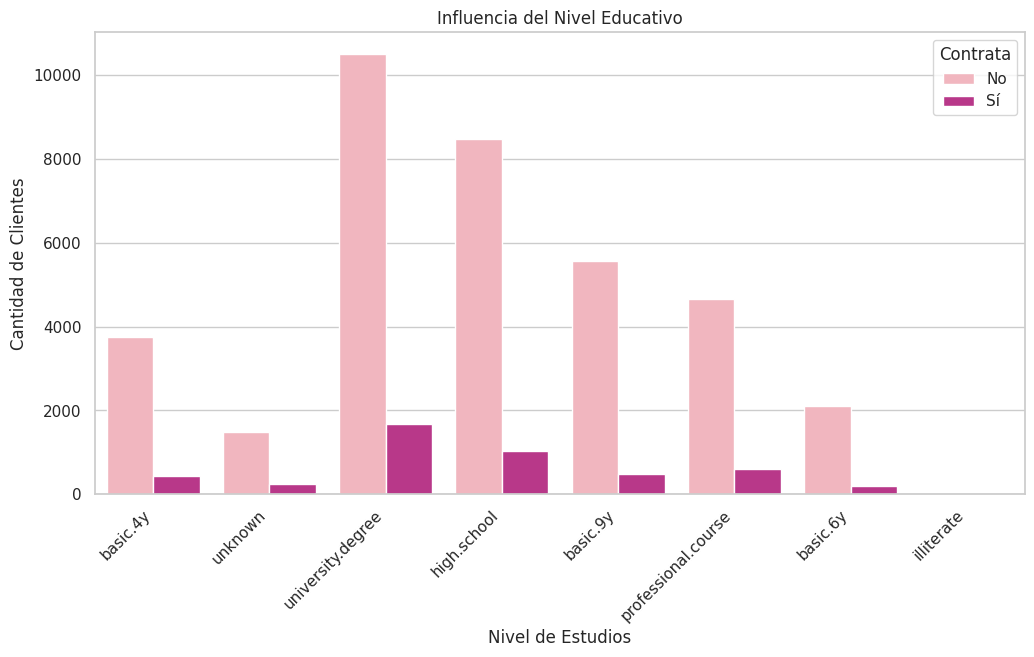

In [20]:
plt.figure(figsize=(12, 6))

# Gráfica: Educación vs Resultado
sns.countplot(x='education', hue='y', data=df_train, palette='RdPu')

# Rotamos etiquetas para que se lean bien
plt.xticks(rotation=45, ha='right')
plt.title('Influencia del Nivel Educativo')
plt.xlabel('Nivel de Estudios')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Contrata', labels=['No', 'Sí'])
plt.show()

Observamos que los clientes con estudios universitarios (university.degree) son el grupo más numeroso y también el que más contrata en números absolutos. Por contra, los grupos con educación básica (basic.4y, basic.6y) tienen tasas de participación más bajas.

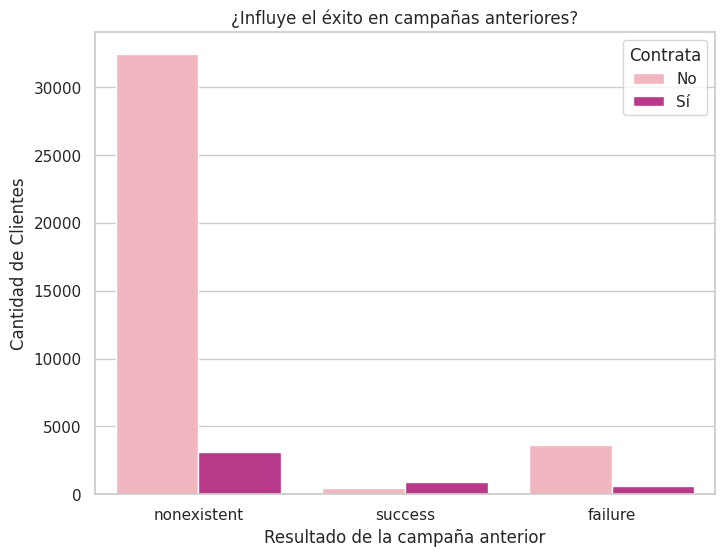

In [21]:
plt.figure(figsize=(8, 6))

# Gráfica: Resultado Anterior vs Resultado Actual
sns.countplot(x='poutcome', hue='y', data=df_train, palette='RdPu')

plt.title('¿Influye el éxito en campañas anteriores?')
plt.xlabel('Resultado de la campaña anterior')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Contrata', labels=['No', 'Sí'])
plt.show()

Success: Si el cliente ya aceptó una oferta en el pasado (barra 'success'), ¡es muy probable que acepte esta también! Fíjate que la barra de 'Sí' es casi tan alta como la de 'No'.

Nonexistent: La mayoría son clientes nuevos (nunca contactados antes), donde cuesta mucho más convencerlos."

<Figure size 1200x1200 with 0 Axes>

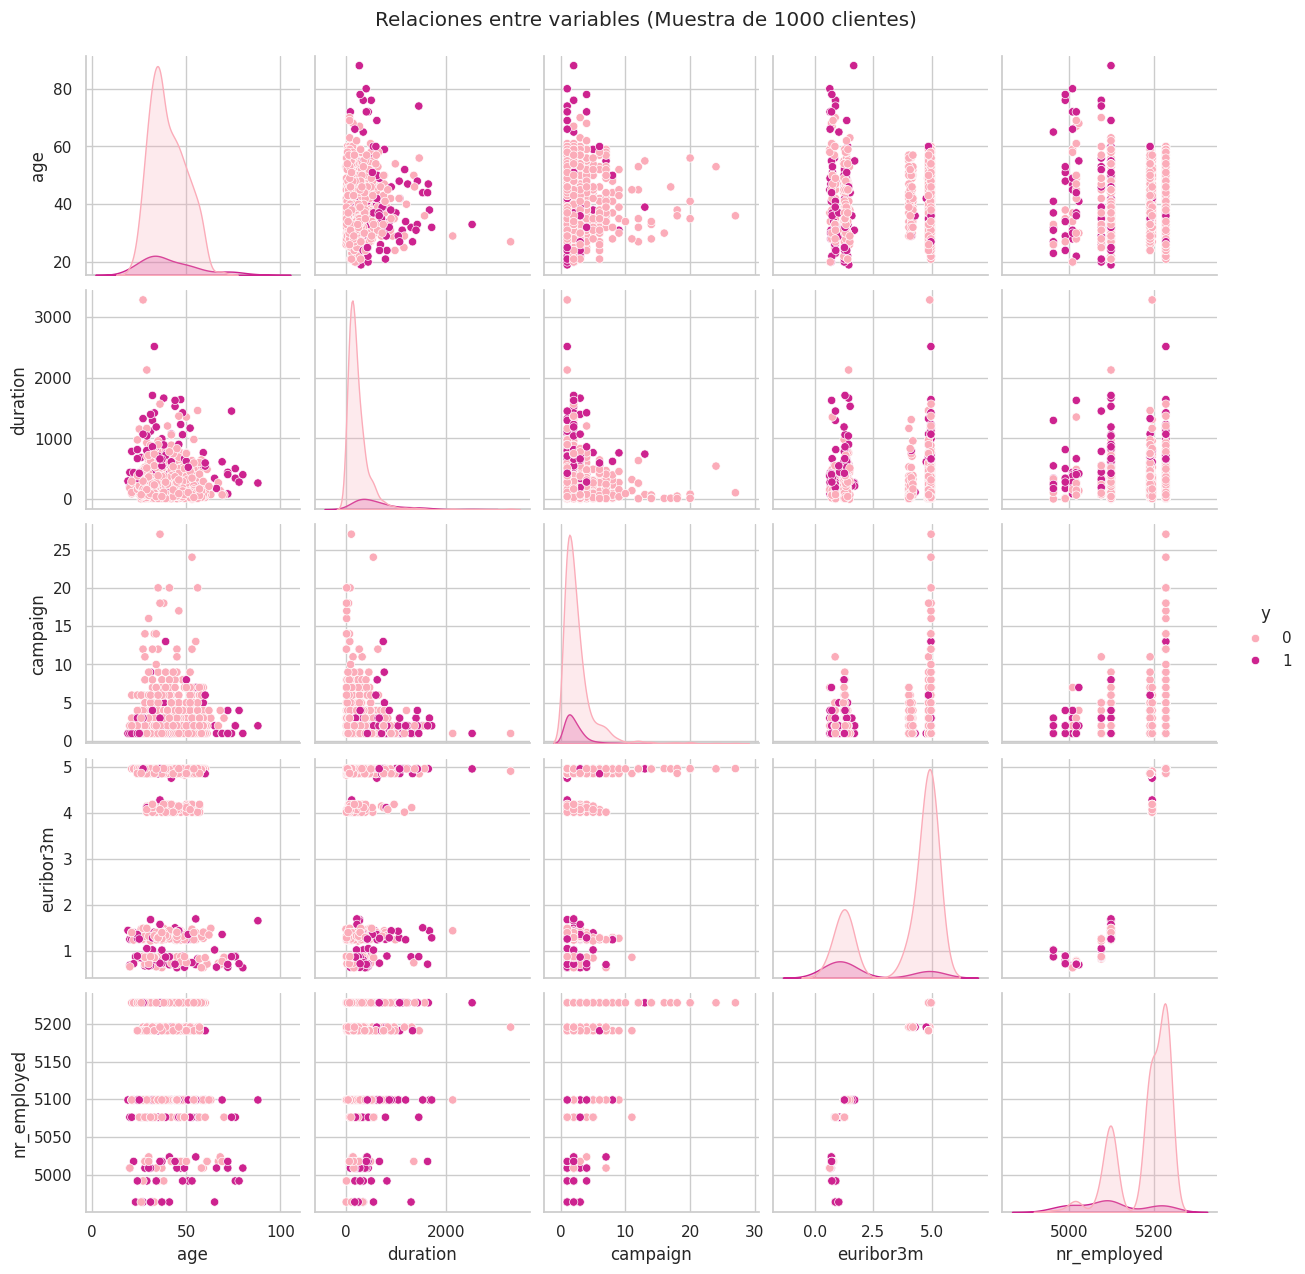

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# CORRECCIÓN: Usamos guiones bajos (_) en lugar de puntos (.)
cols_interesantes = ['age', 'duration', 'campaign', 'euribor3m', 'nr_employed', 'y']

# Cogemos una muestra de 1000 clientes al azar para que no tarde mucho
df_sample = df_train[cols_interesantes].sample(n=1000, random_state=42)

plt.figure(figsize=(12, 12))

# PAIRPLOT
sns.pairplot(df_sample, hue='y', palette='RdPu', diag_kind='kde')

plt.suptitle("Relaciones entre variables (Muestra de 1000 clientes)", y=1.02)
plt.show()

En este gráfico de dispersión no buscamos una correlación lineal perfecta (líneas rectas), sino la **capacidad de separación** entre las clases:
* **Puntos Claros (0 - No):** Clientes que rechazaron.
* **Puntos Oscuros (1 - Yes):** Clientes que aceptaron.

**Observaciones principales:**

1.  **Variable `duration` (Duración de la llamada):**
    * Es la variable que mejor separa las clases. Observamos que los puntos oscuros (Yes) tienden a situarse en valores altos de duración.
    * *Interpretación:* Si la llamada es muy corta, es casi imposible vender el crédito. Si la llamada se alarga, la probabilidad de éxito aumenta.

2.  **Variables Económicas (`euribor3m`, `nr_employed`):**
    * Vemos una concentración de puntos oscuros (éxitos) cuando estas variables tienen valores bajos.
    * *Interpretación:* Parece más fácil conseguir un "Sí" cuando los tipos de interés (Euribor) están bajos y el mercado laboral no está saturado.

3.  **Variable `age` (Edad):**
    * Los puntos oscuros y claros están muy mezclados en todo el rango de edad.
    * *Interpretación:* La edad por sí sola no parece ser un factor determinante para separar a los clientes; gente de todas las edades compra y rechaza por igual.

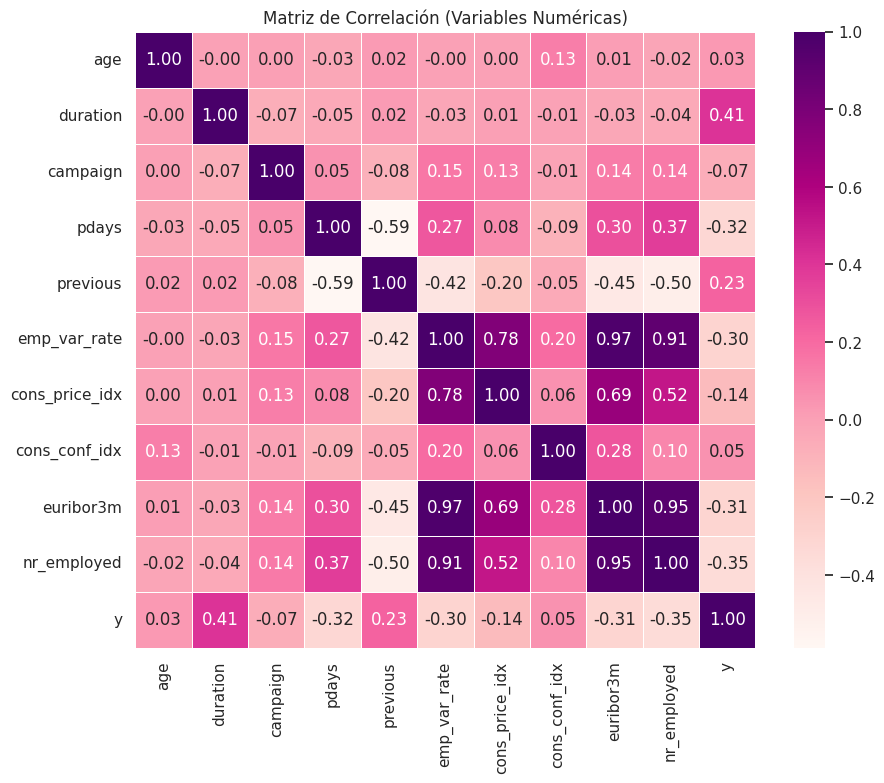

In [ ]:
# Filtramos solo las columnas numéricas
df_numeric = df_train.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='RdPu', fmt=".2f", linewidths=0.5)

plt.title("Matriz de Correlación (Variables Numéricas)")
plt.show()



1.  **Relación con el Objetivo (y):**
    * **`duration`:** Muestra la correlación positiva más fuerte. Esto confirma nuestra hipótesis de que la duración de la llamada es el predictor individual más potente: a mayor duración, mayor probabilidad de éxito ('Yes').
    * **Variables Socioeconómicas (`nr_employed`, `euribor3m`):** Muestran una correlación negativa relevante. Esto indica que el contexto económico influye: en momentos de tipos de interés altos o mercado laboral saturado, la tasa de éxito de la campaña disminuye.

2.  **Multicolinealidad (Relación entre variables):**
    * Detectamos una correlación extremadamente alta (>0.90) entre `emp.var.rate`, `euribor3m` y `nr_employed`.
    * **Conclusión:** Estas tres variables aportan información redundante.

------

## 3. Preprocessing data


In [24]:
from sklearn.preprocessing import LabelEncoder

# Hacemos una copia para no estropear el original
df_train_ready = df_train.copy()

# Identificamos las columnas que son texto (Object)
cat_cols = df_train_ready.select_dtypes(include=['object']).columns.tolist()

print("Columnas que vamos a transformar a números:", cat_cols)

# Aplicamos el LabelEncoder 
le = LabelEncoder()

for col in cat_cols:
    # Ajustamos y transformamos cada columna
    df_train_ready[col] = le.fit_transform(df_train_ready[col])

# 4. Verificamos el resultado
print("\n--- Así ha quedado el Dataset (Todo Números) ---")
display(df_train_ready.head())

print("\nINFORMACIÓN FINAL:")
df_train_ready.info()

Columnas que vamos a transformar a números: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

--- Así ha quedado el Dataset (Todo Números) ---


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,1,1,0,1,2,0,0,1,2,...,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53,9,1,7,0,0,0,0,7,0,...,1,999,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,4,2,6,0,2,0,0,4,2,...,3,6,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,7,1,3,0,0,0,0,0,0,...,2,999,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,5,1,0,0,2,0,0,1,0,...,1,3,1,2,-2.9,92.201,-31.4,0.869,5076.2,1



INFORMACIÓN FINAL:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_i


En esta etapa preparamos los datos para que puedan ser procesados por los algoritmos de Machine Learning, ya que estos trabajan matemáticamente y no pueden interpretar texto directamente.

**Procedimiento realizado:**
1.  Hemos identificado las **variables categóricas** (tipo `object`) como 'job', 'marital', 'education', etc.
2.  Hemos aplicado la técnica de **Label Encoding** utilizando la librería `sklearn`.
    * *¿Qué hace?* Asigna un número único a cada categoría (ej: en la columna 'marital', 'single' -> 0, 'married' -> 1).
3.  El resultado se ha guardado en un nuevo dataframe llamado **`df_train_ready`**.

**Resultado:** Ahora disponemos de un dataset 100% numérico, listo para las fases de entrenamiento.

---------

## 4. Creación del modelo y división del dataset

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separamos las características (X) de la variable objetivo (y)
X = df_train_ready.drop('y', axis=1)  # Todo menos la columna 'y'
y = df_train_ready['y']               # Solo la columna 'y'

# Dividimos en conjunto de Entrenamiento (80%) y Prueba (20%)
# random_state=42 asegura que siempre salga la misma división (para que sea reproducible)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Escalado de Datos 
scaler = StandardScaler()

# Aprendemos la escala solo con los datos de entrenamiento para no hacer trampa
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("--- Formas de los conjuntos ---")
print(f"Entrenamiento (X_train): {X_train.shape}")
print(f"Prueba (X_test): {X_test.shape}")
print("\n¡Datos listos y escalados!")

--- Formas de los conjuntos ---
Entrenamiento (X_train): (32950, 20)
Prueba (X_test): (8238, 20)

¡Datos listos y escalados!



Antes de entrenar los modelos, realizamos dos pasos críticos:

1.  **División Train/Test:**
    * Separamos el dataset en un 80% para entrenamiento (`X_train`) y un 20% para validación (`X_test`).
    * Esto nos permitirá evaluar la calidad de nuestros modelos con datos que "nunca han visto", simulando un entorno real.

2.  **Escalado (StandardScaler):**
    * Aplicamos estandarización para que todas las variables tengan media 0 y desviación estándar 1.
    * **¿Por qué es vital?** Algoritmos como **KNN** (que usa distancias) o **Regresión Logística** son muy sensibles a la escala. Sin este paso, variables con valores numéricos grandes (como `age` o `duration`) dominarían sobre variables pequeñas (como `euribor3m`), arruinando la predicción.

--------

## 5. Entrenamiento

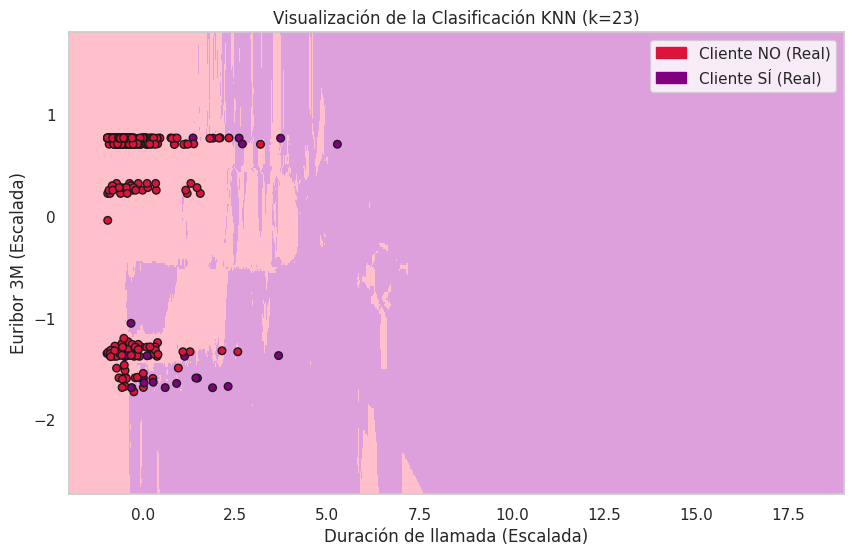

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier

# --- 1. PREPARACIÓN (Solo usamos 2 variables para poder dibujar) ---
# Elegimos las 2 variables que mejor separan: 'duration' y 'euribor3m'
columnas = list(X.columns)
idx_x = columnas.index('duration')
idx_y = columnas.index('euribor3m')

# Cogemos los datos escalados (solo esas 2 columnas)
X_vis = X_train_scaled[:, [idx_x, idx_y]]
y_vis = y_train.values

# --- 2. ENTRENAMOS UN KNN "VISUAL" ---
# Usamos el K óptimo que calcule (23) abajo lo calcule
k_vecinos = 23
clf_vis = KNeighborsClassifier(n_neighbors=k_vecinos)
clf_vis.fit(X_vis, y_vis)

# --- 3. CREAMOS LA MALLA (El fondo de colores) ---
h = 0.02  # Tamaño del pixel de la malla
# Buscamos los límites del dibujo
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

# El modelo predice el color para cada pixel de la pantalla
Z = clf_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# --- 4. DIBUJAMOS ---
plt.figure(figsize=(10, 6))

cmap_fondo = ListedColormap(['#FFC0CB', '#DDA0DD']) # Rosa Claro (No) / Lila Claro (Sí)
cmap_puntos = ListedColormap(["#2B2224", '#800080']) # Rojo Carmesí (No) / Morado (Sí)

# Pintamos el fondo (Zonas de decisión)
plt.pcolormesh(xx, yy, Z, cmap=cmap_fondo, shading='auto')

# Pintamos los puntos (Una muestra de 300 para no emborronar)
idx_muestras = np.random.choice(len(X_vis), 300, replace=False)
plt.scatter(X_vis[idx_muestras, 0], X_vis[idx_muestras, 1], c=y_vis[idx_muestras], 
            cmap=cmap_puntos, edgecolor='k', s=30)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"Visualización de la Clasificación KNN (k={k_vecinos})")
plt.xlabel("Duración de llamada (Escalada)")
plt.ylabel("Euribor 3M (Escalada)")

# Leyenda manual para que se entienda
import matplotlib.patches as mpatches
no_patch = mpatches.Patch(color='#DC143C', label='Cliente NO (Real)')
si_patch = mpatches.Patch(color='#800080', label='Cliente SÍ (Real)')
plt.legend(handles=[no_patch, si_patch])

plt.show()

En esta gráfica visualizamos las Fronteras de Decisión del modelo.

Zonas de Color: Representan la predicción del algoritmo. Vemos que el modelo ha aprendido que con Duraciones altas (derecha) y Euribor bajo (abajo), la zona se vuelve Lila (Predicción = SÍ).

Puntos: Son los clientes reales. Observamos que la mayoría de puntos morados (clientes que compraron) caen correctamente dentro de la zona lila, aunque hay algunos 'intrusos' en la zona rosa, lo que representa el error natural del modelo.

Calculando Accuracy para cada K... (Espere un momento)


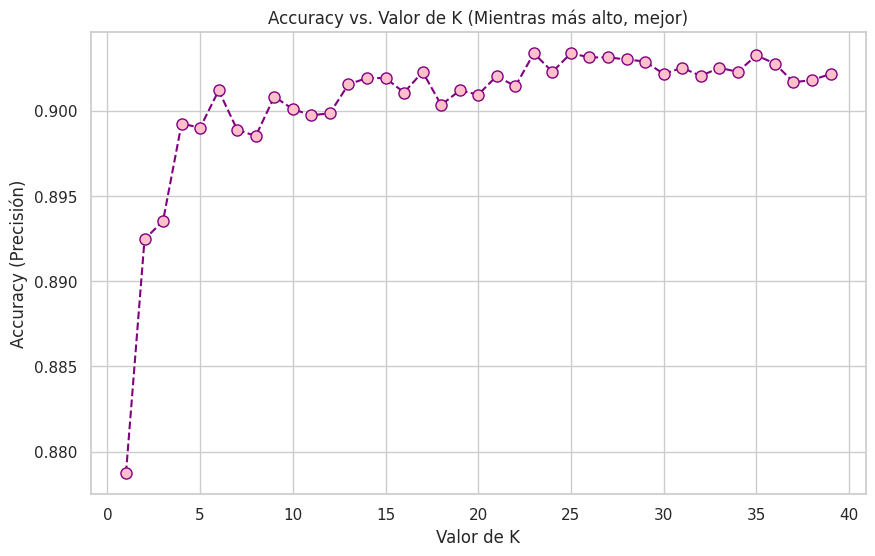

El K ÓPTIMO (con mayor Accuracy) es: 23
Su Accuracy es: 90.34%


In [36]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Vamos a guardar la Accuracy (Acierto) para cada K
lista_accuracy = []

# Probamos K desde 1 hasta 40
rango_k = range(1, 40)

print("Calculando Accuracy para cada K... (Espere un momento)")

for k in rango_k:
    # Entrenamos
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    # Predecimos y guardamos la nota (Accuracy)
    pred_k = knn.predict(X_test_scaled)
    lista_accuracy.append(accuracy_score(y_test, pred_k))

# --- 1. GRÁFICA DE ACCURACY ---
plt.figure(figsize=(10, 6))
plt.plot(rango_k, lista_accuracy, color='purple', linestyle='dashed', 
        marker='o', markerfacecolor='pink', markersize=8)

plt.title('Accuracy vs. Valor de K (Mientras más alto, mejor)')
plt.xlabel('Valor de K')
plt.ylabel('Accuracy (Precisión)')
plt.grid(True)
plt.show()

# --- 2. CÁLCULO AUTOMÁTICO DEL MEJOR K ---
# Buscamos la más alta
mejor_accuracy = max(lista_accuracy)

# Buscamos qué K sacó esa nota
# (Sumamos 1 porque la lista empieza en 0)
mejor_k = lista_accuracy.index(mejor_accuracy) + 1

print(f"El K ÓPTIMO (con mayor Accuracy) es: {mejor_k}")
print(f"Su Accuracy es: {mejor_accuracy:.2%}")

In [37]:
# Entrenamos el modelo FINAL con el valor de k en este caso es 23
knn_final = KNeighborsClassifier(n_neighbors=mejor_k)
knn_final.fit(X_train_scaled, y_train)

,n_neighbors,23
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


----------

## 6. Análisis de resultados

Precisión Global (Accuracy): 90.34%



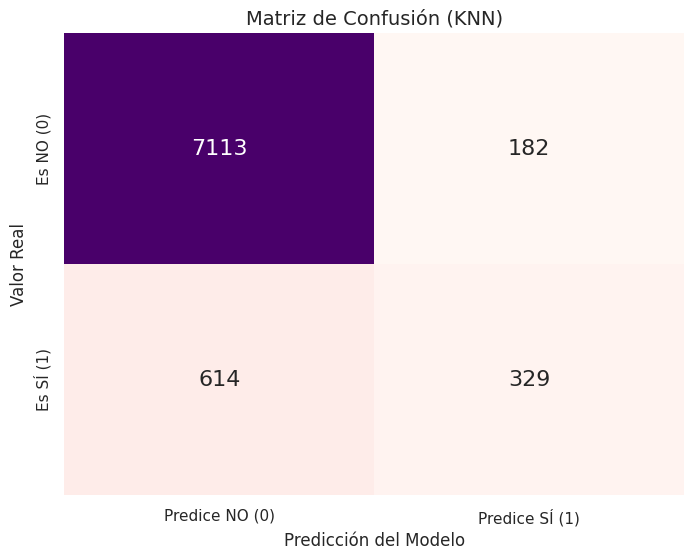


--- Informe de Clasificación ---
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7295
           1       0.64      0.35      0.45       943

    accuracy                           0.90      8238
   macro avg       0.78      0.66      0.70      8238
weighted avg       0.89      0.90      0.89      8238



In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Hacemos las predicciones usando el modelo FINAL que entrenaste antes
# (Asegúrate de que tu modelo se llame 'knn_final' o 'classifier')
y_pred = knn_final.predict(X_test_scaled)

# --- A. PRECISIÓN GLOBAL ---
acc = accuracy_score(y_test, y_pred)
print(f"Precisión Global (Accuracy): {acc:.2%}\n")

# --- B. MATRIZ DE CONFUSIÓN (Visual) ---
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)


sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu', cbar=False, annot_kws={"size": 16})

plt.title(f'Matriz de Confusión (KNN)', fontsize=14)
plt.xlabel('Predicción del Modelo', fontsize=12)
plt.ylabel('Valor Real', fontsize=12)
# Ponemos etiquetas manuales para que se entienda mejor
plt.xticks([0.5, 1.5], ['Predice NO (0)', 'Predice SÍ (1)'])
plt.yticks([0.5, 1.5], ['Es NO (0)', 'Es SÍ (1)'])
plt.show()

# --- C. INFORME DETALLADO (Números) ---
print("\n--- Informe de Clasificación ---")
print(classification_report(y_test, y_pred))


La matriz de confusión nos permite analizar en detalle dónde acierta y dónde falla nuestro modelo KNN:

1.  **Verdaderos Negativos (Esquina Superior Izquierda):**
    * Son los casos donde el modelo predijo correctamente que el cliente **NO** contrataría.
    * **Observación:** Es el número más alto (miles de casos), lo cual es lógico porque la mayoría de la gente no contrata. El modelo es muy bueno "filtrando" a los desinteresados.

2.  **Falsos Positivos (Esquina Superior Derecha):**
    * El modelo predijo que **SÍ** contratarían, pero en realidad dijeron que no.
    * **Impacto:** Representa un coste operativo (hacer llamadas inútiles), pero no es un error crítico.

3.  **Falsos Negativos (Esquina Inferior Izquierda) :**
    * **El error más crítico:** Clientes que realmente contrataron el servicio, pero el modelo predijo que **NO** lo harían.
    * **Impacto:** Estos son **clientes perdidos** y dinero que el banco deja de ganar porque el modelo no supo detectarlos. Si este número es alto, el modelo es demasiado conservador.

4.  **Verdaderos Positivos (Esquina Inferior Derecha):**
    * Los casos de éxito: El modelo detectó a los clientes interesados y acertó.
    * **Conclusión:** Nuestro objetivo principal sería aumentar este número para maximizar las ventas de la campaña.

----------

## 7. Realización de predicciones

In [45]:
# --- 7. Realización de Predicciones ---

print("Analizando los 5 primeros clientes del conjunto de prueba (Test)...\n")
print("Leyenda: Clase 0 = NO Contrata | Clase 1 = SÍ Contrata")
print("-" * 60)

# Cogemos los 5 primeros clientes del test
clientes_ejemplo = X_test_scaled[:5]

# 1. Hacemos la predicción final (Sí o No)
predicciones = knn_final.predict(clientes_ejemplo)

# 2. Vemos la probabilidad (La seguridad del modelo)
probabilidades = knn_final.predict_proba(clientes_ejemplo)

# Mostramos los resultados uno a uno
for i in range(5):
    pred = predicciones[i]
    prob = probabilidades[i]
    
    # prob[0] es la probabilidad de que sea NO
    # prob[1] es la probabilidad de que sea SÍ
    print(f"Cliente #{i+1}:")
    print(f"   > Predicción: {pred} ({'SÍ Contrata' if pred==1 else 'NO Contrata'})")
    print(f"   > Confianza:  {prob[1]*100:.2f}% de probabilidad de éxito.")
    print("-" * 60)

Analizando los 5 primeros clientes del conjunto de prueba (Test)...

Leyenda: Clase 0 = NO Contrata | Clase 1 = SÍ Contrata
------------------------------------------------------------
Cliente #1:
   > Predicción: 0 (NO Contrata)
   > Confianza:  0.00% de probabilidad de éxito.
------------------------------------------------------------
Cliente #2:
   > Predicción: 0 (NO Contrata)
   > Confianza:  4.35% de probabilidad de éxito.
------------------------------------------------------------
Cliente #3:
   > Predicción: 0 (NO Contrata)
   > Confianza:  43.48% de probabilidad de éxito.
------------------------------------------------------------
Cliente #4:
   > Predicción: 0 (NO Contrata)
   > Confianza:  0.00% de probabilidad de éxito.
------------------------------------------------------------
Cliente #5:
   > Predicción: 0 (NO Contrata)
   > Confianza:  0.00% de probabilidad de éxito.
------------------------------------------------------------



En este apartado simulamos la puesta en producción del modelo utilizando clientes del conjunto de test. Utilizamos dos métodos clave de `sklearn`:

1.  **`clf.predict()`**: Nos devuelve la decisión final del modelo (Clase 0 o Clase 1). Es el resultado "duro".
2.  **`clf.predict_proba()`**: Nos muestra la "seguridad" del modelo.
    * Devuelve dos valores: `[Probabilidad de No, Probabilidad de Sí]`.
    * *Ejemplo:* Si obtenemos una probabilidad de **0.20** (20%) para la clase 'Sí', el modelo clasificará al cliente como **0 (No)**.
    * Si obtenemos una probabilidad de **0.90** (90%), el modelo lo clasificará como **1 (Sí)** con mucha seguridad.

Esta información es vital para el banco, ya que nos permitiría priorizar las llamadas a los clientes con mayor probabilidad de éxito (por ejemplo, aquellos con >80% de probabilidad).

------------

## 8. Visualización

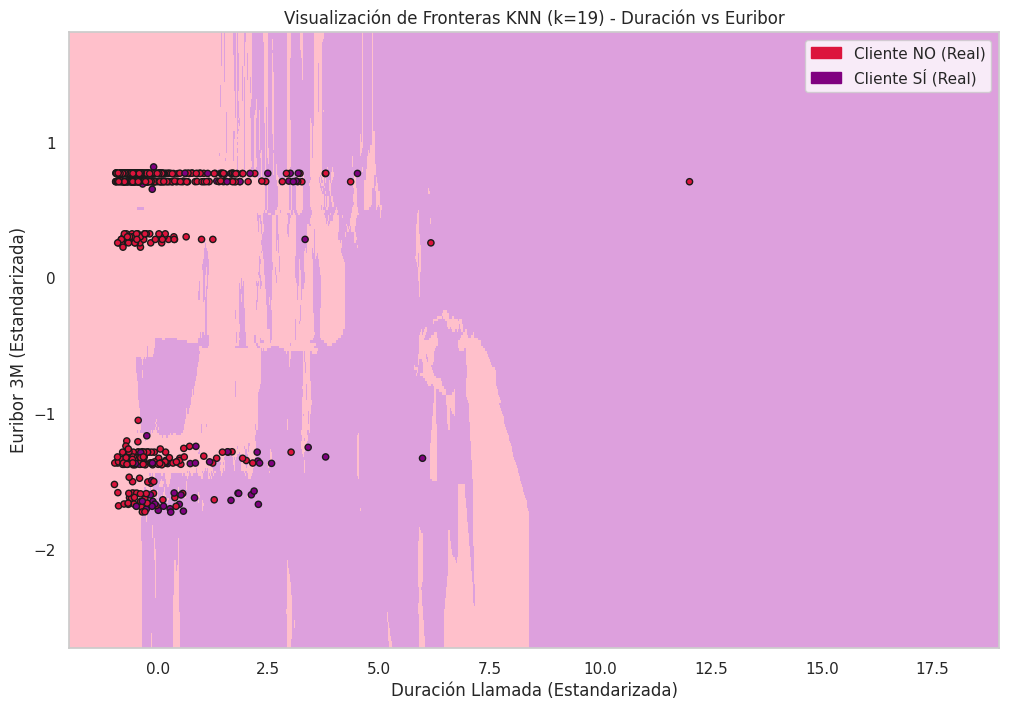

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.neighbors import KNeighborsClassifier

# --- 1. PREPARACIÓN DE DATOS (Solo 2 variables para poder dibujar) ---
# Usamos 'duration' y 'euribor3m' porque son las que más influyen
# Buscamos en qué columna están dentro de tu matriz X
cols_names = list(X.columns) 
idx_dur = cols_names.index('duration')
idx_eur = cols_names.index('euribor3m')

# Cogemos los datos ESCALADOS (solo esas 2 columnas)
X_vis = X_train_scaled[:, [idx_dur, idx_eur]]
y_vis = y_train.values

# --- 2. ENTRENAMOS EL MODELO VISUAL ---
# Usamos el mismo número de vecinos que tu modelo final (ej: 19)
k_visual = 19 
clf_vis = KNeighborsClassifier(n_neighbors=k_visual)
clf_vis.fit(X_vis, y_vis)

# --- 3. CREAMOS EL MAPA DE COLOR ---
h = 0.02  # Tamaño del pixel
# Límites del gráfico
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

# El modelo predice el color para cada punto
Z = clf_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# --- 4. DIBUJAMOS ---
plt.figure(figsize=(12, 8))

# Colores Rosas 🌸
cmap_fondo = ListedColormap(['#FFC0CB', '#DDA0DD']) # Rosa Claro (No) / Lila (Sí)
cmap_puntos = ListedColormap(['#DC143C', '#800080']) # Rojo (No) / Morado (Sí)

# Pintamos las zonas
plt.pcolormesh(xx, yy, Z, cmap=cmap_fondo, shading='auto')

# Pintamos los puntos (Una muestra de 600 para no saturar)
idx_sample = np.random.choice(len(X_vis), 600, replace=False)
plt.scatter(X_vis[idx_sample, 0], X_vis[idx_sample, 1], c=y_vis[idx_sample], 
            cmap=cmap_puntos, edgecolor='k', s=20)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Leyenda
patch0 = mpatches.Patch(color='#DC143C', label='Cliente NO (Real)')
patch1 = mpatches.Patch(color='#800080', label='Cliente SÍ (Real)')
plt.legend(handles=[patch0, patch1], loc='upper right')

plt.title(f"Visualización de Fronteras KNN (k={k_visual}) - Duración vs Euribor")
plt.xlabel("Duración Llamada (Estandarizada)")
plt.ylabel("Euribor 3M (Estandarizada)")
plt.show()

### Visualización de Fronteras de Decisión

Dado que nuestro modelo original trabaja con más de 20 dimensiones, es imposible representarlo gráficamente en un plano 2D. Para esta visualización, hemos generado una simplificación utilizando las dos variables con mayor correlación: **Duración de la llamada** y **Euribor**.

**Interpretación del Gráfico:**
1.  **Zonas de Color (Predicción del Modelo):**
    * **Zona Rosa Claro:** Región donde el algoritmo predice que el cliente **NO** aceptará el crédito.
    * **Zona Lila:** Región donde el algoritmo predice que **SÍ** aceptará.
    * *Observación:* Se ve claramente cómo el modelo aprende que a mayor duración (derecha) y menor Euribor (abajo), aumenta la probabilidad de éxito.

2.  **Puntos (Datos Reales):**
    * Los puntos superpuestos son una muestra de clientes reales.
    * Podemos ver cómo los puntos morados (clientes que compraron) tienden a agruparse en la zona lila, validando la lógica del modelo.